# ***MEMORIA***

(en progreso)

**Introducción:**

En el transcurso de este proyecto, me he propuesto abordar el desafío de predecir la popularidad de canciones en función de sus características musicales. Para lograr este objetivo, he utilizado diversas técnicas de aprendizaje automático, incluyendo modelos de regresión como Random Forest y Gradient Boosting, así como el enfoque no supervisado K-Means. La meta era desarrollar un modelo preciso que pudiera proporcionar insights valiosos sobre las preferencias musicales y la popularidad de las canciones.

Aunque hasta el momento los resultados no satisfacen mis expectativas, considero que es una buena idea, que quiero seguir desarrollando hasta quedar conforme con las predicciones.


**Resumen del Proyecto:**

1. **Preprocesamiento de Datos:**
   - Inicio el proyecto explorando y limpiando un conjunto de datos que contenía información sobre varias características musicales y la popularidad de las canciones. Todas, métricas dadas por spotify.
   - Realicé una normalización de los datos para asegurar que todas las variables estuvieran en una escala comparable. Esto se ha hecho casi al final, después de tropezarme una y veinte veces con un MSE que me pareció desmesurado.

2. **Modelos:**
   - He entrenado 5 modelos de aprendizaje supervisado: Linear Regression, KNN, Decision Tree, Random Forest y Gradient Boosting, para predecir la popularidad de las canciones.
   - Utilicél Mean Squared Error (MSE) para evaluar el rendimiento de los modelos.

3. **Modelo No Supervisado:**
   - Exploré el uso del algoritmo K-Means como un enfoque no supervisado para agrupar las canciones en clusters.

4. **Optimización de Modelos:**
   - Ajuste hiperparámetros y realicé Grid Search para encontrar la configuración óptima de los modelos de regresión.
   - Consideré la posibilidad de overfitting y apliqué técnicas como el bagging para mejorar la generalización del modelo, antes de dar con la escala de los datos.

5. **Evaluación del Modelo:**
   - se evaluó el rendimiento de nuestros modelos utilizando métricas específicas y comparamos los resultados con la varianza de la variable objetivo.

6. **Generación de Predicciones:**
   - Al momento, he intentado sin exito, la puesta a prueba del modelo de regresión para realizar predicciones sobre un conjunto de datos ficticio de nuevas canciones.

7. **Configuración del Modelo:**
   - Creé un archivo YAML que contiene la configuración de los modelos Random forest y gradient boost, que fueron los que en principio han parecido dar mejores resultados, facilitando así su reproducción y comprensión.

Al abordar estos pasos, he avanzado en nuestro objetivo de comprender y predecir la popularidad de las canciones, explorando diversas técnicas de aprendizaje automático y optimizando nuestros modelos para obtener resultados más precisos. Este proyecto no solo ha mejorado mis habilidades en el campo del aprendizaje automático, sino que también ha proporcionado información valiosa sobre el proceso de construcción y evaluación de modelos predictivos en el ámbito musical.

### ***--Más información sobre lo que he ido haciendo en la carpeta notebooks--***


In [17]:
%store -r nuevo_merged_filtrado

In [18]:
nuevo_merged_filtrado.head()

,id_x,name,popularity,duration_ms,artists,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres
7283,26VPiy1V7zJGGbxJ0BQ99E,Bandstand Boogie,19,120893,Les Elgart,0.623,0.782,5,0.0642,0.722,0.880,0.3320,0.5900,109.045,easy listening
18917,0X0os5JWXl3gZBJBGPsZod,Blues-Opera Act II,0,722760,Andre Kostelanetz & His Orchestra,0.148,0.368,7,0.0402,0.953,0.786,0.1430,0.0420,168.050,easy listening
19112,1YyJznATh26J71SeViR0LU,Blues-Opera Act I,0,848667,Andre Kostelanetz & His Orchestra,0.293,0.395,0,0.0474,0.926,0.834,0.2920,0.0851,117.310,easy listening
19134,1dVYS3Ba01EtkDgfunQzcq,Out Of This World,0,309827,Andre Kostelanetz & His Orchestra,0.130,0.342,9,0.0355,0.936,0.776,0.1310,0.0393,96.979,easy listening
19403,2r5IiwxvPWl5czcxHKZB2e,Stormy Weather - 78rpm Version,0,251160,Andre Kostelanetz & His Orchestra,0.179,0.338,2,0.0374,0.973,0.952,0.0929,0.0813,87.676,easy listening


In [19]:
y = nuevo_merged_filtrado['popularity']
X = nuevo_merged_filtrado[['duration_ms', 'danceability', 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Regresión lineal

In [22]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [23]:
linear_reg_model.score(X,y)

0.15615750219739288

In [24]:
y_pred_linear_reg = linear_reg_model.predict(X_test)

In [25]:
# Evaluación del rendimiento
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
print(f'Mean Squared Error (Regresión Lineal): {mse_linear_reg}')

Mean Squared Error (Regresión Lineal): 332.9213942341013


In [26]:
import numpy as np

In [27]:
rmse = np.sqrt(mse_linear_reg)
rmse

18.24613367905928

## Random forest

In [28]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
# Training
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
# test
y_pred_random_forest = random_forest_model.predict(X_test)

In [31]:
# Evaluación  del rendimiento
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print(f'Mean Squared Error (Regresión de Bosques Aleatorios): {mse_random_forest}')

Mean Squared Error (Regresión de Bosques Aleatorios): 286.1648597866273


# SVM

In [32]:
svm_model = SVR()

In [33]:
# Training
svm_model.fit(X_train, y_train)

SVR()

In [34]:
y_pred_svm = svm_model.predict(X_test)

In [35]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'Mean Squared Error (Máquinas de Soporte Vectorial): {mse_svm}')

Mean Squared Error (Máquinas de Soporte Vectorial): 368.44747854805865


# Decision tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [37]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [39]:
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print(f'Mean Squared Error (Decision Tree Regressor): {mse_decision_tree}')

Mean Squared Error (Decision Tree Regressor): 502.8176682521721


# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
gradient_boosting_model = GradientBoostingRegressor()


In [42]:
# Training
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [43]:
# testing
predictions = gradient_boosting_model.predict(X_test)

In [44]:
mse_gradient_boosting = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error (Gradient Boosting): {mse_gradient_boosting}")

Mean Squared Error (Gradient Boosting): 300.206573657304


## KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
# Crear el modelo KNN
knn_model = KNeighborsRegressor()

In [47]:
# Entrenar el modelo en los datos de entrenamiento
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
# Realizar predicciones en el conjunto de prueba
predicciones_knn = knn_model.predict(X_test)

In [49]:
# Calcular el Mean Squared Error (MSE) para KNN
mse_knn = mean_squared_error(y_test, predicciones_knn)

print(f'Mean Squared Error (KNN): {mse_knn}')

Mean Squared Error (KNN): 390.129983324069


# **GRID SEARCH**

### Linear regression

Al ser un modelo muy sencillo, no necesitamos hiperparametrizar. No hay hiperparámetros adicionales para ajustar con el greed search.

In [50]:
linear_model = LinearRegression()

In [51]:
linear_params = {}
linear_grid = GridSearchCV(linear_model, linear_params, scoring='neg_mean_squared_error', cv=5)

In [52]:
linear_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_squared_error')

In [53]:
print("Mejores parámetros Linear Regression:", linear_grid.best_params_)

Mejores parámetros Linear Regression: {}


In [54]:
# Predicciones en el conjunto de prueba para Regresión Lineal
predicciones_lineal = linear_grid.predict(X_test)

# Calcula el MSE para Regresión Lineal
mse_lineal = mean_squared_error(y_test, predicciones_lineal)

print(f'Mean Squared Error (Regresión Lineal): {mse_lineal}')


Mean Squared Error (Regresión Lineal): 332.9213942341013


### Random Forest

In [55]:
forest_model = RandomForestRegressor()

In [56]:
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
forest_grid = GridSearchCV(forest_model, forest_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [57]:
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [58]:
print("Mejores parámetros Random Forest:", forest_grid.best_params_)

Mejores parámetros Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [81]:
# Predicciones en el conjunto de prueba para Bosques Aleatorios
predicciones_bosques = forest_grid.predict(X_test)

# Calcula el MSE para Bosques Aleatorios
mse_bosques = mean_squared_error(y_test, predicciones_bosques)

print(f'Mean Squared Error (Random Forest): {mse_bosques}')


Mean Squared Error (Random Forest): 279.8941146744626


## Decision Tree

In [60]:
tree_model = DecisionTreeRegressor()

In [61]:
tree_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
tree_grid = GridSearchCV(tree_model, tree_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [62]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [63]:
print("Mejores parámetros Decision Tree:", tree_grid.best_params_)

Mejores parámetros Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [64]:
# Predicciones en el conjunto de prueba para Árbol de Decisión
predicciones_arbol = tree_grid.predict(X_test)

# Calcula el MSE para Árbol de Decisión
mse_arbol = mean_squared_error(y_test, predicciones_arbol)

print(f'Mean Squared Error (Árbol de Decisión): {mse_arbol}')


Mean Squared Error (Árbol de Decisión): 356.33438982387725


### Gradient boost

In [65]:
gradient_model = GradientBoostingRegressor()

In [66]:
gradient_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gradient_grid = GridSearchCV(gradient_model, gradient_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [67]:
gradient_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [68]:
print("Mejores parámetros Gradient Boost:", gradient_grid.best_params_)

Mejores parámetros Gradient Boost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


In [69]:
# Predicciones en el conjunto de prueba para Gradient Boosting
predicciones_gradient = gradient_grid.predict(X_test)

# Calcula el MSE para Gradient Boosting
mse_gradient = mean_squared_error(y_test, predicciones_gradient)

print(f'Mean Squared Error (Gradient Boosting): {mse_gradient}')


Mean Squared Error (Gradient Boosting): 284.7174725744024


## KNN

In [70]:
knn_model = KNeighborsRegressor()

In [71]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [72]:
knn_grid = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [73]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [74]:
print("Mejores parámetros KNN:", knn_grid.best_params_)

Mejores parámetros KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}


In [75]:
# Predicciones en el conjunto de prueba para Gradient Boosting
predicciones_knn = knn_grid.predict(X_test)

# Calcula el MSE para Gradient Boosting
mse_knn = mean_squared_error(y_test, predicciones_knn)

print(f'Mean Squared Error (KNN): {mse_knn}')

Mean Squared Error (KNN): 383.8142505473562


# Best models

### Random Forest: MSE = 279.5760806316304

### Gradient Boosting: MSE = 284.3000946069707

In [77]:
from sklearn.model_selection import cross_val_score


In [78]:
forest_grid.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [80]:
forest_grid.best_score_

-277.4942019205009

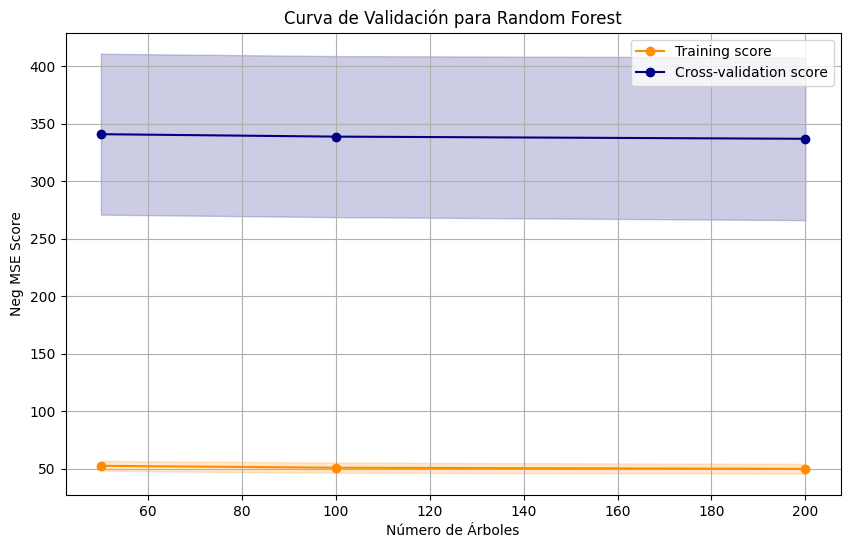

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

# Hiperparámetros a evaluar
param_range = [50, 100, 200]  # Número de árboles en el bosque

# Calcula la curva de validación
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="neg_mean_squared_error", cv=5, n_jobs=-1
)

# Calcula las medias y desviaciones estándar de los puntajes
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotea la curva de validación
plt.figure(figsize=(10, 6))
plt.title("Curva de Validación para Random Forest")
plt.xlabel("Número de Árboles")
plt.ylabel("Neg MSE Score")
plt.grid()

# Plotea las curvas de entrenamiento y prueba
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", marker='o')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")

plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", marker='o')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy")

plt.legend(loc="best")
plt.show()


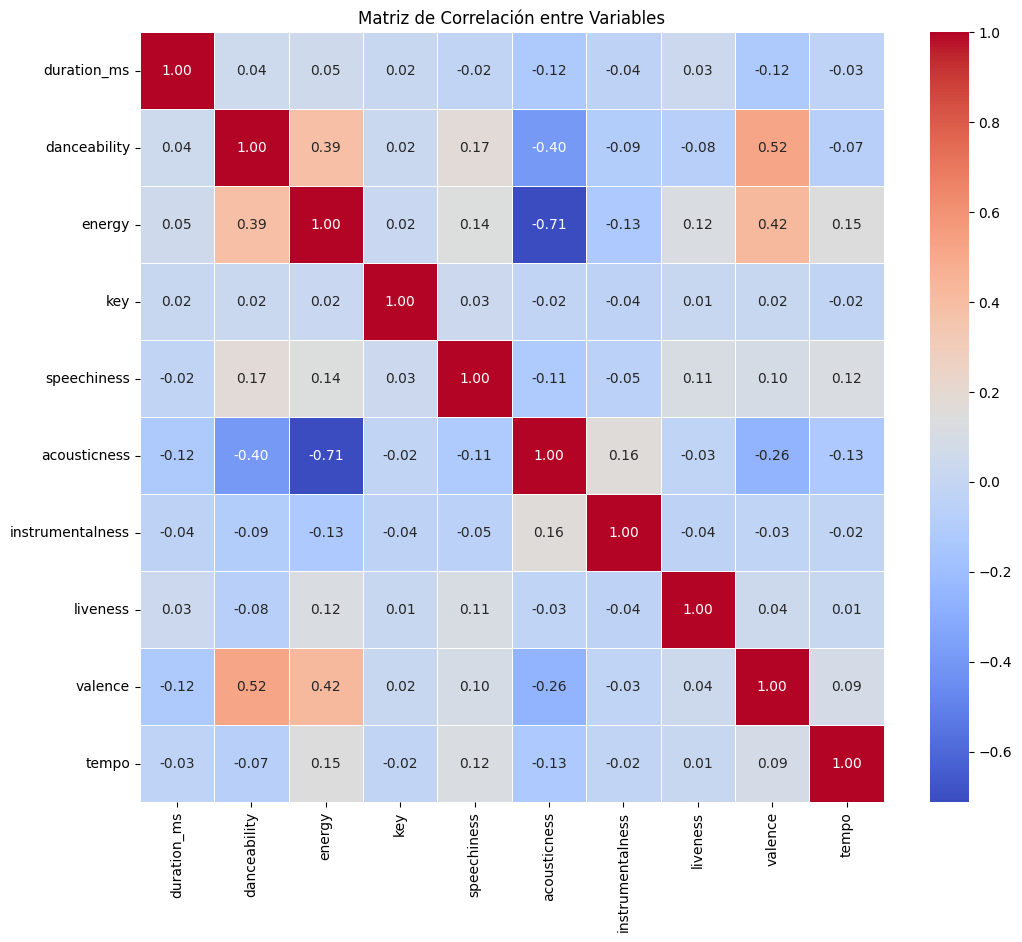

In [83]:
import seaborn as sns

# Genera la matriz de correlación
correlation_matrix = X.corr()

# Plotea la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()


In [89]:
import pandas as pd

/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_28930/1250458252.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


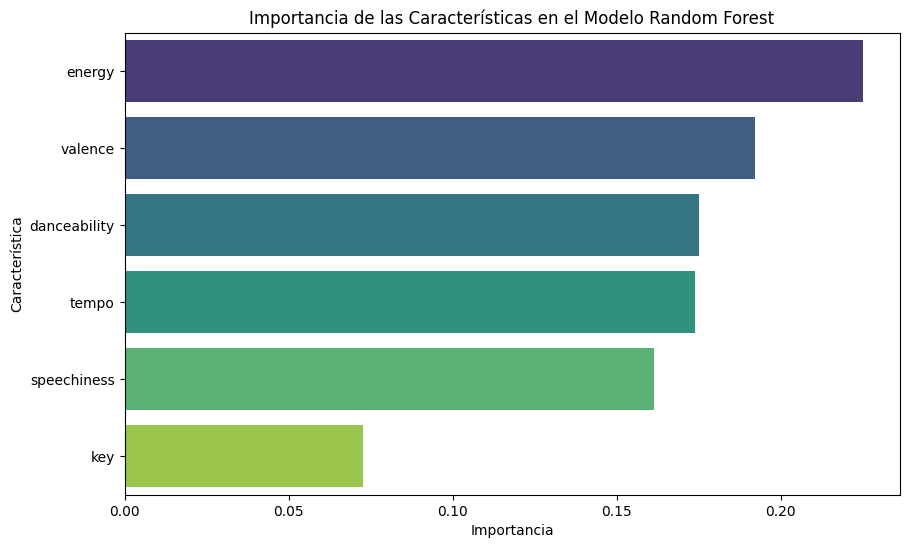

In [90]:
# Entrenamos un modelo Random Forest con las variables seleccionadas
X_selected = nuevo_merged_filtrado[['danceability', 'energy', 'valence', 'tempo', 'key', 'speechiness']]
y_selected = nuevo_merged_filtrado['popularity']

rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_selected, y_selected)

# Obtenemos la importancia de las características
feature_importance = rf_model_selected.feature_importances_

# Creamos un DataFrame para visualizar mejor la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_selected.columns, 'Importance': feature_importance})

# Ordenamos el DataFrame por importancia de características
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizamos la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


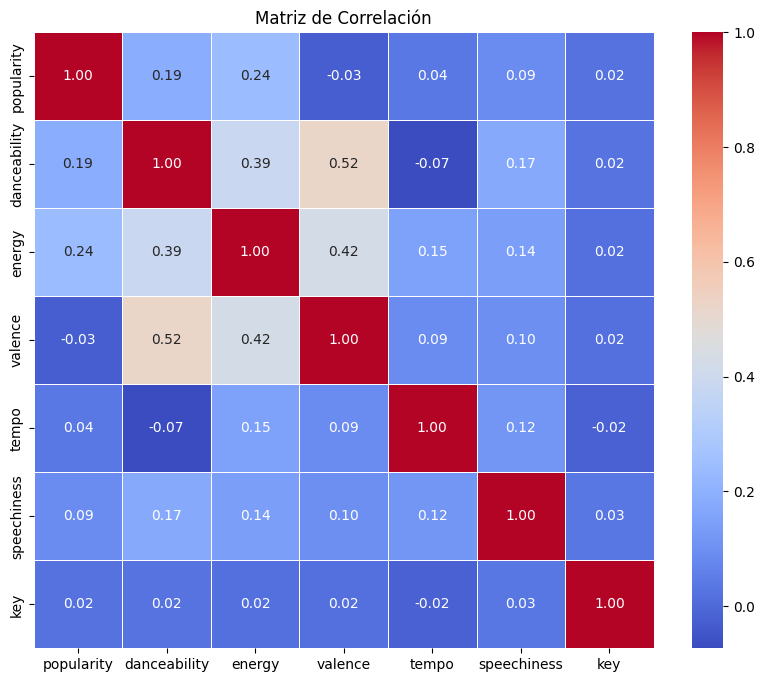

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_seleccionadas = ['popularity', 'danceability', 'energy', 'valence', 'tempo', 'speechiness', 'key']
datos_seleccionados = nuevo_merged_filtrado[variables_seleccionadas]

# Calcular la matriz de correlación
matriz_correlacion = datos_seleccionados.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


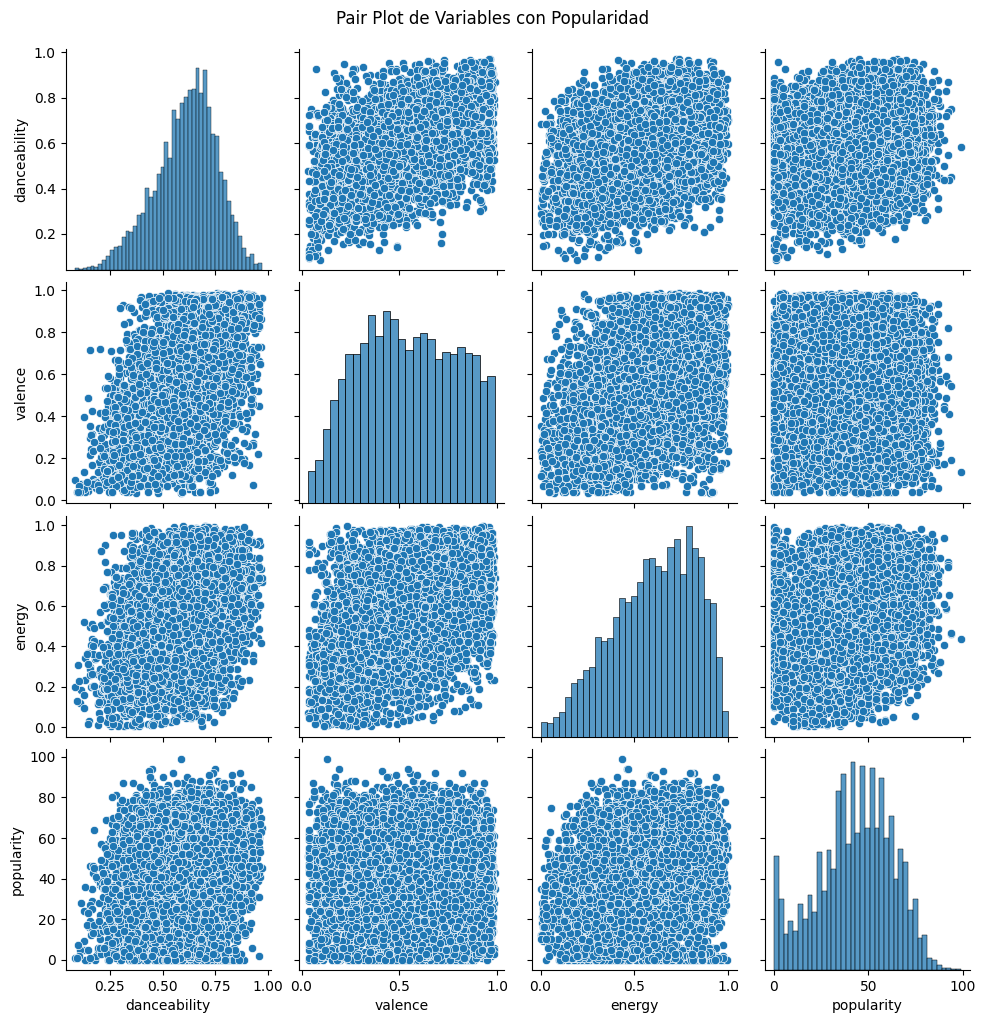

In [84]:
# Pair plot entre varias variables y 'popularity'
sns.pairplot(nuevo_merged_filtrado[['danceability', 'valence', 'energy', 'popularity']])
plt.suptitle('Pair Plot de Variables con Popularidad', y=1.02)
plt.show()


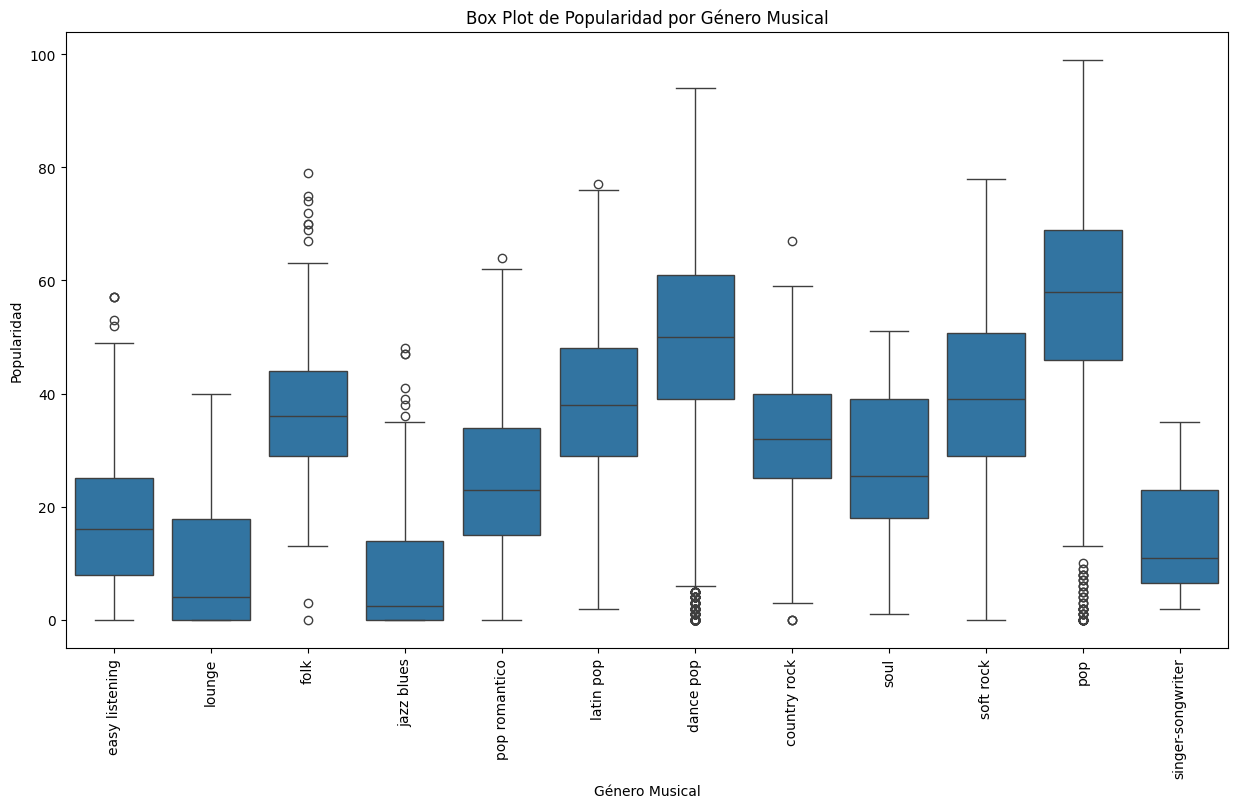

In [85]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='genres', y='popularity', data=nuevo_merged_filtrado)
plt.title('Box Plot de Popularidad por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=90)
plt.show()


# Reentrenamiento

------
-
-------
-------
-
-------

In [108]:

# Estadísticas descriptivas para la columna de popularidad
popularity_stats = nuevo_merged_filtrado['popularity'].describe()

# Rango de la columna de popularidad
popularity_range = np.ptp(nuevo_merged_filtrado['popularity'])

print("Estadísticas descriptivas de Popularidad:")
print(popularity_stats)
print("\nRango de Popularidad:", popularity_range)


Estadísticas descriptivas de Popularidad:
count    8995.000000
mean       43.249138
std        19.682940
min         0.000000
25%        31.000000
50%        45.000000
75%        58.000000
max        99.000000
Name: popularity, dtype: float64

Rango de Popularidad: 99


In [109]:
# Estadísticas descriptivas para las columnas seleccionadas
selected_columns = ['danceability', 'energy', 'valence']

selected_columns_stats = nuevo_merged_filtrado[selected_columns].describe()

# Imprimir resultados
print("Estadísticas descriptivas de las columnas seleccionadas:")
print(selected_columns_stats)


Estadísticas descriptivas de las columnas seleccionadas:
       danceability       energy      valence
count   8995.000000  8995.000000  8995.000000
mean       0.610556     0.602236     0.544325
std        0.146525     0.219435     0.244191
min        0.084500     0.002580     0.032900
25%        0.520000     0.447000     0.347000
50%        0.626000     0.626000     0.539000
75%        0.712000     0.785000     0.751000
max        0.970000     0.997000     0.988000


Hagamos que todas las variables que queremos estén en la misma escala

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Seleccionamos las variables relevantes, incluyendo la popularidad
variables_seleccionadas = ['popularity', 'danceability', 'energy', 'valence']
datos_seleccionados = nuevo_merged_filtrado[variables_seleccionadas]

# Normalizar los datos
scaler = MinMaxScaler()
datos_norm = scaler.fit_transform(datos_seleccionados)

# Separar las variables independientes (X) y la variable dependiente (y)
X1 = datos_norm[:, 1:]  # Excluir la columna de popularidad
y1 = datos_norm[:, 0]   # Tomar solo la columna de popularidad

# Modelos
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boost_model = GradientBoostingRegressor(random_state=42)
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Pipeline para Random Forest y Gradient Boosting
regression_pipeline = Pipeline([
    ('model', None)  # El modelo se establecerá dinámicamente en cada iteración
])

# Entrenar y evaluar modelos
models = [random_forest_model, gradient_boost_model, kmeans_model]
model_names = ['Random Forest', 'Gradient Boosting', 'KMeans']

for model, name in zip(models, model_names):
    regression_pipeline.set_params(model=model)
    regression_pipeline.fit(X1, y1)
    
    if name != 'KMeans':
        # Si el modelo no es KMeans, realizar predicciones y calcular el MSE
        predictions = regression_pipeline.predict(X1)
        mse = mean_squared_error(y1, predictions)
        print(f'Mean Squared Error ({name}): {mse}')
    else:
        # Si el modelo es KMeans, imprimir solo para información
        print(f'No se puede calcular MSE para el modelo {name} (no es un modelo de regresión)')



Mean Squared Error (Random Forest): 0.0064694286999516515
Mean Squared Error (Gradient Boosting): 0.03195817569600916


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No se puede calcular MSE para el modelo KMeans (no es un modelo de regresión)


In [203]:
X

,duration_ms,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
7283,120893,0.623,0.782,5,0.0642,0.72200,0.880000,0.3320,0.5900,109.045
18917,722760,0.148,0.368,7,0.0402,0.95300,0.786000,0.1430,0.0420,168.050
19112,848667,0.293,0.395,0,0.0474,0.92600,0.834000,0.2920,0.0851,117.310
19134,309827,0.130,0.342,9,0.0355,0.93600,0.776000,0.1310,0.0393,96.979
19403,251160,0.179,0.338,2,0.0374,0.97300,0.952000,0.0929,0.0813,87.676
...,...,...,...,...,...,...,...,...,...,...
586038,179333,0.600,0.714,7,0.0286,0.01770,0.000008,0.3420,0.7870,139.389
586404,214253,0.477,0.290,7,0.0271,0.86200,0.781000,0.3390,0.1140,99.987
586494,290760,0.663,0.822,9,0.0557,0.00413,0.003180,0.2340,0.5670,128.002
586551,250747,0.699,0.761,10,0.0457,0.04660,0.000000,0.1070,0.4430,120.044


In [199]:
X1

array([[0.608131  , 0.78379357, 0.58328971],
       [0.0717109 , 0.36747049, 0.0095278 ],
       [0.23546019, 0.39462199, 0.05465396],
       ...,
       [0.65330322, 0.82401802, 0.55920846],
       [0.69395822, 0.76267573, 0.42937912],
       [0.41389046, 0.19349973, 0.26499843]])

In [204]:
df_X1 = X1
n_columnas = ["danceability", "energy", "valence"]
X1df = pd.DataFrame(df_X1, columns=n_columnas)

In [205]:
X1df.head()

,danceability,energy,valence
0,0.608131,0.783794,0.583290
1,0.071711,0.367470,0.009528
2,0.235460,0.394622,0.054654
3,0.051383,0.341325,0.006701
4,0.106719,0.337302,0.050675


In [206]:
datos_norm

array([[0.19191919, 0.608131  , 0.78379357, 0.58328971],
       [0.        , 0.0717109 , 0.36747049, 0.0095278 ],
       [0.        , 0.23546019, 0.39462199, 0.05465396],
       ...,
       [0.55555556, 0.65330322, 0.82401802, 0.55920846],
       [0.60606061, 0.69395822, 0.76267573, 0.42937912],
       [0.02020202, 0.41389046, 0.19349973, 0.26499843]])

In [163]:
df_norm = pd.DataFrame(datos_norm, columns=variables_seleccionadas)


In [207]:
df_norm.head(15)

,popularity,danceability,energy,valence
0,0.191919,0.608131,0.783794,0.583290
1,0.000000,0.071711,0.367470,0.009528
2,0.000000,0.235460,0.394622,0.054654
3,0.000000,0.051383,0.341325,0.006701
4,0.000000,0.106719,0.337302,0.050675
5,0.020202,0.110107,0.339313,0.024186
6,0.212121,0.386787,0.199533,0.512093
7,0.000000,0.287408,0.561553,0.851324
8,0.141414,0.480519,0.369482,0.678568
9,0.010101,0.527950,0.122101,0.142498


In [167]:
df_norm.shape

(8995, 4)

In [166]:
datos_seleccionados.head()

,popularity,danceability,energy,valence
7283,19,0.623,0.782,0.5900
18917,0,0.148,0.368,0.0420
19112,0,0.293,0.395,0.0851
19134,0,0.130,0.342,0.0393
19403,0,0.179,0.338,0.0813


In [165]:
varianza_popularidad = df_norm['popularity'].var()
print("Varianza de Popularidad:", varianza_popularidad)

Varianza de Popularidad: 0.03952842895414025


Con los datos normalizados, el modelo parece estar entendiendo mejor a qué se enfrenta (POR FIN).

Ahora visualizamos:



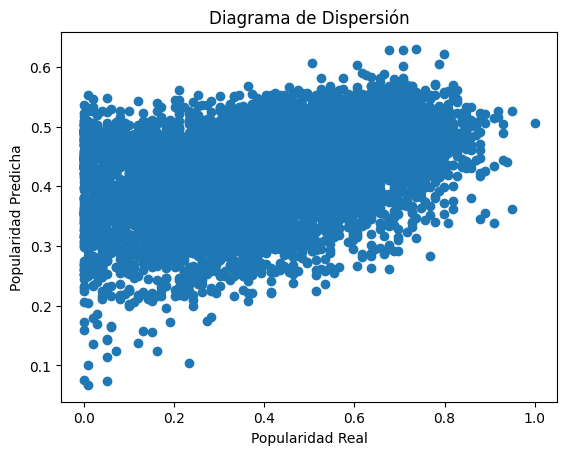

In [170]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

#diagrama de dispersión
plt.scatter(y1, predictions)
plt.xlabel('Popularidad Real')
plt.ylabel('Popularidad Predicha')
plt.title('Diagrama de Dispersión')
plt.show()

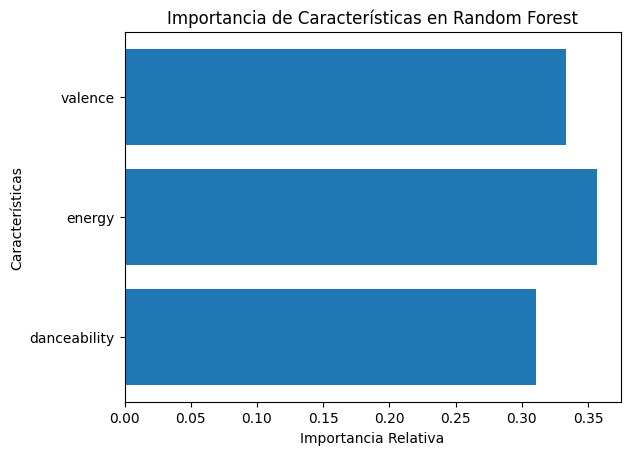

In [171]:
# Gráfico de feature importance
feature_importance = random_forest_model.feature_importances_
feature_names = variables_seleccionadas[1:]  # Excluyendo la popularidad
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.title('Importancia de Características en Random Forest')
plt.show()

In [172]:
# Curvas de Aprendizaje
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X1, y1, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

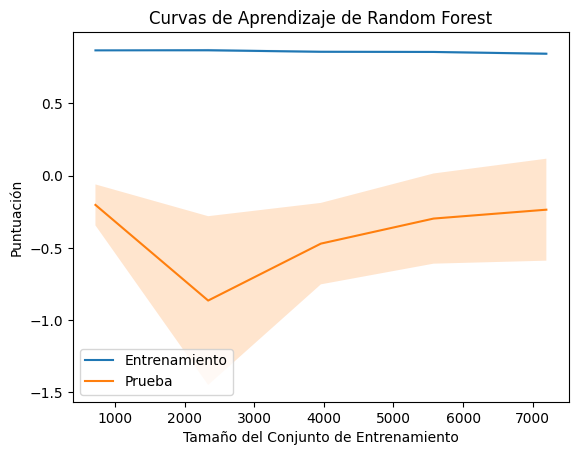

In [173]:
plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Prueba')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curvas de Aprendizaje de Random Forest')
plt.legend()
plt.show()

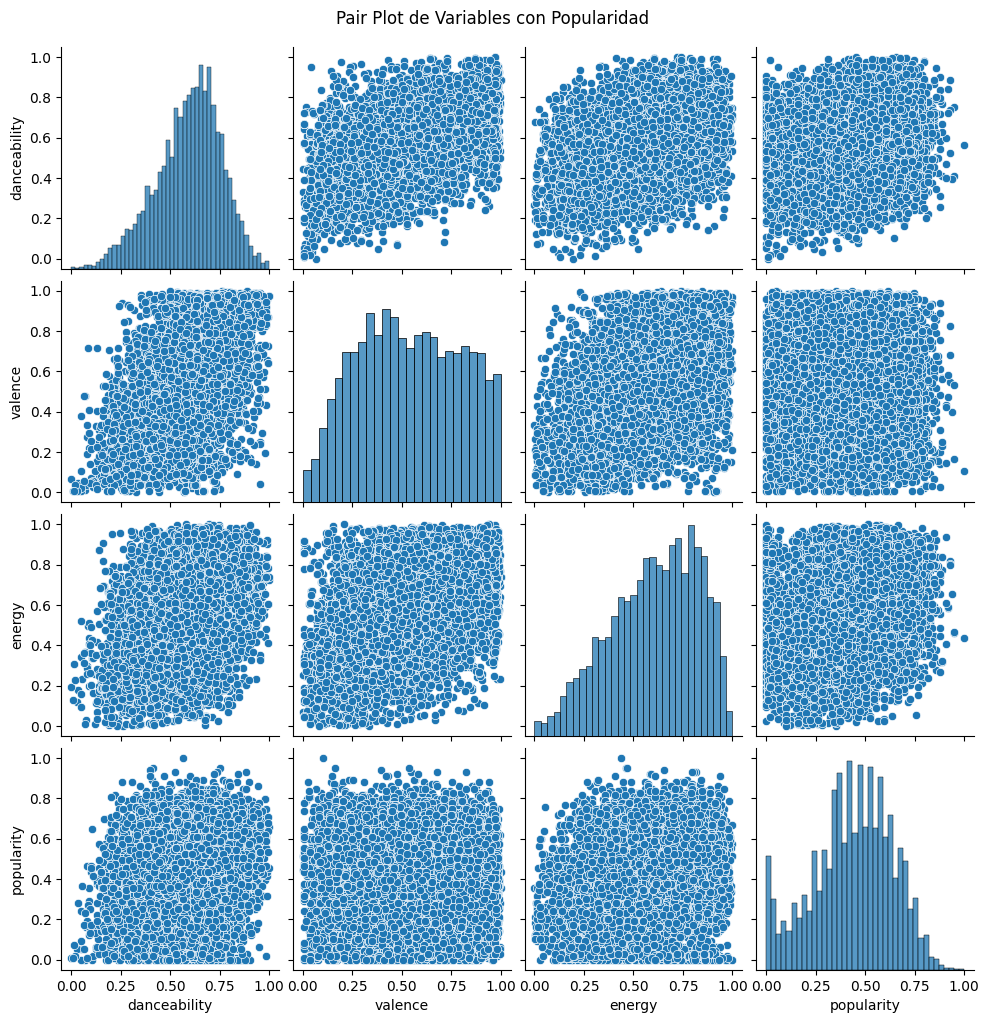

In [208]:
sns.pairplot(df_norm[['danceability', 'valence', 'energy', 'popularity']])
plt.suptitle('Pair Plot de Variables con Popularidad', y=1.02)
plt.show()

Ahora utilizaremos el data set de nuestro supuesto artista.

In [193]:
new_artist = pd.read_csv("/Users/julyetsi/Data Science VSCode/Carpeta_trabajo/3-Machine_Learning/0-MLProject/Data/data_cort.csv", sep=';')

In [194]:
new_artist.head(22)

,song,Artist,danceability,energy,Valence
0,Starlight,cort,0.77,0.85,0.80
1,Echoes,cort,0.80,0.88,0.82
2,Midnight,cort,0.78,0.87,0.79
3,Sparkling Dreams,cort,0.82,0.89,0.83
4,Eternal Harmony,cort,0.77,0.86,0.78
5,Dancing Shadows,cort,0.79,0.88,0.80
6,Mystic Melodies,cort,0.81,0.89,0.82
7,Rendezvous,cort,0.76,0.86,0.77
8,Glowing Hearts,cort,0.79,0.88,0.80
9,Velvet Serenity,cort,0.83,0.90,0.84


In [217]:
# Cambiar el nombre de la columna
new_artist.rename(columns={'Valence': 'valence'}, inplace=True)
new_artist.head()


,song,Artist,danceability,energy,valence
0,Starlight,cort,0.77,0.85,0.80
1,Echoes,cort,0.80,0.88,0.82
2,Midnight,cort,0.78,0.87,0.79
3,Sparkling Dreams,cort,0.82,0.89,0.83
4,Eternal Harmony,cort,0.77,0.86,0.78


He intentado utilizsr este nuevo data set para predecir con el modelo, pero será tarea para más tarde.

Probemos el modelo

------
------

.

______
_______
______
______
______

.

-------
-------

# pkls

In [220]:
%pip install joblib


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [222]:
import joblib

# Random Forest
joblib.dump(random_forest_model, 'random_forest_model.pkl')




['random_forest_model.pkl']

In [224]:
# Kmeans
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [225]:
# Linear Regression
joblib.dump(linear_model, 'linear_model.pkl')

# KNN
joblib.dump(knn_model, 'knn_model.pkl')

# Decision Tree
joblib.dump(tree_model, 'tree_model.pkl')

['tree_model.pkl']

## yaml

In [227]:
%pip install PyYAML



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [228]:
import yaml

model_config = {
    'random_forest':
        {
            'model_type': 'Random Forest',
            'hyperparameters':
                {
                    'n_estimators': 100,
                    'max_depth': None,
                    'min_samples_split': 2,
                    'min_samples_leaf': 1,
                    'random_state': 42
                }
        },
    'gradient_boost':
        {
            'model_type': 'Gradient Boosting',
            'hyperparameters':
                {
                    'n_estimators': 100,
                    'learning_rate': 0.1,
                    'max_depth': 3,
                    'min_samples_split': 2,
                    'min_samples_leaf': 1,
                    'random_state': 42
                }
        }
}

# Guardamo el diccionario en un archivo YAML
with open('model_config.yaml', 'w') as file:
    yaml.dump(model_config, file)


## pruebas a ignorar...

Definitivamente nos quedamos con el random forest. Hagamos un poco de baggin para reducir el overfitting


In [129]:
X3 = datos_seleccionados[['danceability', 'energy', 'valence']]
y3 = datos_seleccionados['popularity']

In [130]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [149]:
# Ajuste del número de árboles y iniciodel muestreo bootstrap
#Estamos estableciendo el numero de arboles en 500 como prueba y haciendo True a bootstrap, lo que significa que cada arbol se entrena en un subconjunto aleatorioi de los datos de training
random_forest_model3 = RandomForestRegressor(n_estimators=50, random_state=42)

In [150]:
random_forest_model3.fit(X_train3, y_train3)

RandomForestRegressor(n_estimators=50, random_state=42)

In [151]:
y_pred_final = random_forest_model3.predict(X_test3)

In [152]:
y_pred_final

array([44.67166667, 54.01      , 53.61333333, ..., 44.032     ,
       32.54      , 37.3       ])

In [153]:
mse = mean_squared_error(y_test3, y_pred_final)
print(f"Mean Squared Error (Random Forest con Bagging): {mse}")

Mean Squared Error (Random Forest con Bagging): 334.9562205168986


Vamos a obtener la varianza del target para poder interpretar estos resultados del mse

In [138]:
varianza_popularidad = datos_seleccionados['popularity'].var()
print("Varianza de Popularidad:", varianza_popularidad)

Varianza de Popularidad: 387.41813217952847


# más pruebas...

In [113]:
from sklearn.preprocessing import StandardScaler

columnas_independientes = ['danceability', 'energy', 'valence']
columna_dependiente = ['popularity']

# Crearmos StandardScaler
scaler = StandardScaler()

# Normalizar las variables independientes
X_norm = scaler.fit_transform(datos_seleccionados[columnas_independientes])

# Nuevo DataFrame con las variables normalizadas
datos_norm = pd.DataFrame(X_norm, columns=columnas_independientes)

# Agregar la variable dependiente (popularity) al DataFrame normalizado
datos_norm['popularity'] = datos_seleccionados[columna_dependiente].values

datos_norm.head(20)


,danceability,energy,valence,popularity
0,0.084934,0.819257,0.187057,19
1,-3.157009,-1.067509,-2.057215,0
2,-2.167363,-0.944459,-1.880704,0
3,-3.279861,-1.186002,-2.068272,0
4,-2.945429,-1.204231,-1.896266,0
5,-2.924954,-1.195117,-1.999879,2
6,-1.252794,-1.828596,-0.091429,21
7,-1.853406,-0.187930,1.235476,0
8,-0.686307,-1.058394,0.559737,14
9,-0.399651,-2.179517,-1.537101,1


In [115]:
from sklearn.cluster import KMeans


# Definimos  nuevas variables independientes (X) y variable dependiente (y)
X2 = datos_norm[['danceability', 'energy', 'valence']]
y2 = datos_norm['popularity']

# Train-test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Modelos
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
kmeans_model = KMeans(n_clusters=3, random_state=42)  # Número de clusters a probar (puedes ajustar esto)


In [117]:
# Entrenamiento
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [118]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [119]:
kmeans_model.fit(X_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [120]:
# Predicciones test
rf_predictions = random_forest_model.predict(X_test)
gb_predictions = gradient_boosting_model.predict(X_test)
kmeans_predictions = kmeans_model.predict(X_test)

In [121]:
# Evaluar modelos superviados
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Mostrar resultados
print(f'Mean Squared Error (Random Forest): {rf_mse}')
print(f'Mean Squared Error (Gradient Boosting): {gb_mse}')



Mean Squared Error (Random Forest): 286.1648597866273
Mean Squared Error (Gradient Boosting): 300.135370163005


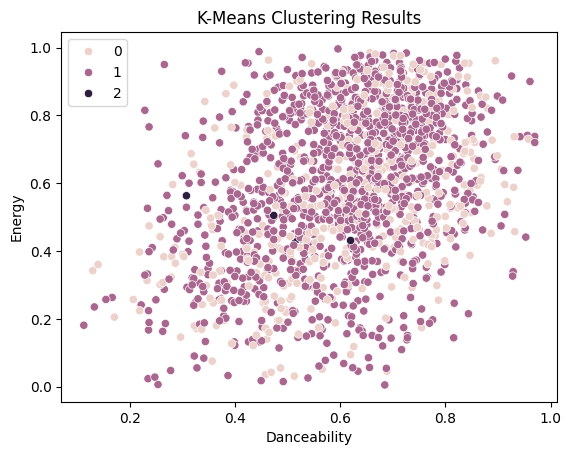

In [124]:
# Visualizar resultados del modelo no supervisado (K-Means)
sns.scatterplot(x='danceability', y='energy', hue=kmeans_predictions, data=X_test)
plt.title('K-Means Clustering Results')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [97]:

X2 = nuevo_merged_filtrado[['danceability', 'energy', 'valence', 'tempo', 'speechiness', 'key']]
y2 = nuevo_merged_filtrado['popularity']

# Train-Test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#Reentrenamos los mejores modelos hasta ahora con las mejores variables y los best params



In [102]:
gradient_model2 = GradientBoostingRegressor(random_state=42)

In [103]:
gradient_params2 = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
gradient_grid2 = GridSearchCV(gradient_model2, gradient_params2, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [104]:
gradient_model2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [98]:
forest_model2 = RandomForestRegressor(random_state=42)

In [99]:
forest_params2 = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
forest_grid2 = GridSearchCV(forest_model2, forest_params2, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [100]:
forest_model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
# Modelos ya entrenados
modelos = [forest_model2, gradient_model2]

# Nombres de los modelos
nombres_modelos = ['Random Forest 2', 'Gradient Boosting 2']

# Diccionario vacío para almacenar los MSE
mse_resultados = {}

# Calculamos y almacenamos el MSE para cada modelo
for modelo, nombre_modelo in zip(modelos, nombres_modelos):
    # Realiza predicciones en el conjunto de prueba
    predicciones = modelo.predict(X_test)
    
    # Calcula el MSE
    mse = mean_squared_error(y_test, predicciones)
    
    # Almacena el resultado en el diccionario
    mse_resultados[nombre_modelo] = mse

for nombre_modelo, mse in mse_resultados.items():
    print(f'Mean Squared Error ({nombre_modelo}): {mse}')


Mean Squared Error (Random Forest 2): 286.1648597866273
Mean Squared Error (Gradient Boosting 2): 300.135370163005


In [106]:
nuevo_merged_filtrado.head(15)

,id_x,name,popularity,duration_ms,artists,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres
7283,26VPiy1V7zJGGbxJ0BQ99E,Bandstand Boogie,19,120893,Les Elgart,0.623,0.7820,5,0.0642,0.7220,0.880000,0.3320,0.5900,109.045,easy listening
18917,0X0os5JWXl3gZBJBGPsZod,Blues-Opera Act II,0,722760,Andre Kostelanetz & His Orchestra,0.148,0.3680,7,0.0402,0.9530,0.786000,0.1430,0.0420,168.050,easy listening
19112,1YyJznATh26J71SeViR0LU,Blues-Opera Act I,0,848667,Andre Kostelanetz & His Orchestra,0.293,0.3950,0,0.0474,0.9260,0.834000,0.2920,0.0851,117.310,easy listening
19134,1dVYS3Ba01EtkDgfunQzcq,Out Of This World,0,309827,Andre Kostelanetz & His Orchestra,0.130,0.3420,9,0.0355,0.9360,0.776000,0.1310,0.0393,96.979,easy listening
19403,2r5IiwxvPWl5czcxHKZB2e,Stormy Weather - 78rpm Version,0,251160,Andre Kostelanetz & His Orchestra,0.179,0.3380,2,0.0374,0.9730,0.952000,0.0929,0.0813,87.676,easy listening
20232,2fTWxjdPM3QGuQjxIWct1o,Captain Horatio Hornblower (1951) Suite,2,340244,Robert Farnon,0.182,0.3400,0,0.0362,0.9720,0.839000,0.3270,0.0560,98.465,easy listening
23650,7wOypVbv6u3sdnjBwLqFgO,Peg O' My Heart,21,133813,"""Jerry Murads Harmonicats""]",0.427,0.2010,11,0.0364,0.3640,0.329000,0.4230,0.5220,67.071,lounge
24286,0NlkgbvvdVwJzhpWntNGwX,The Sardar March,0,177453,"""Jerry Murads Harmonicats""]",0.339,0.5610,5,0.0473,0.0536,0.126000,0.0834,0.8460,174.319,lounge
26676,2dQrJhnUKtPizoqppGVslE,It's All Right with Me,14,283467,Tom Waits,0.510,0.3700,1,0.0433,0.3770,0.000000,0.1980,0.6810,95.885,folk
27328,0NFA1pmQof4CQZJ4vUkPrF,Mary's Boy Child,1,117547,Arthur Lyman,0.552,0.1240,2,0.0495,0.9850,0.941000,0.1120,0.1690,129.478,easy listening
